In [ ]:
!pip install --upgrade plotly



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as st
from scipy import stats
import statistics

from plotly import tools
# import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
df_origin = pd.read_csv('/content/bank-additional-full 2.csv', sep=';')

df_origin.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_origin.shape

(41188, 21)

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df_origin.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


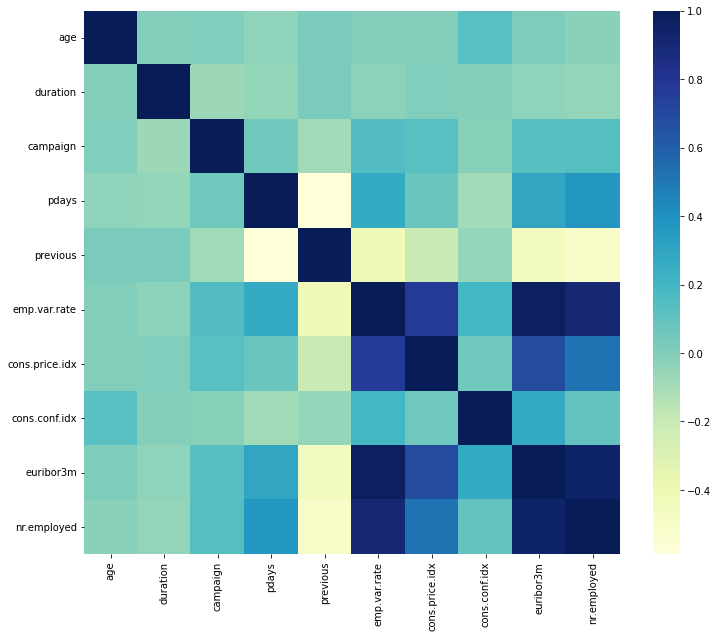

In [ ]:
fog, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_origin.corr(), cmap='YlGnBu')
plt.show()

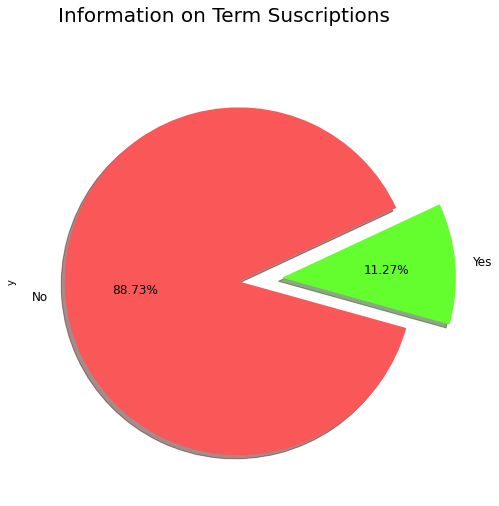

In [ ]:
f, ax = plt.subplots(figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ='No', 'Yes'

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df_origin['y'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


In [ ]:
df_origin.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
df = df_origin[df_origin.y == 'yes']

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.shape

(4640, 21)

# Basic

## age


We will devide the `age` into 4 groups
*   17 to 25 years old
*   26 to 35 years old
*   36 to 50 years old
*   51 to 70 years old
*   71 years old and above





In [ ]:
df_origin['age_grp'] = pd.cut(df_origin.age, bins=[10, 25, 35, 50, 70, 100], labels=['(10, 25]', '(25, 35]', '(35, 50]', '(50, 70]', '70+'])
df_origin.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_grp
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"


In [ ]:
age_grp_org = pd.DataFrame(df_origin.groupby('age_grp').y.value_counts()).rename(columns={'y': 'cnt'})
age_grp_y = age_grp_org.groupby(['age_grp', 'y']).agg({'cnt': 'sum'})

age_grp_org['percentage'] = age_grp_y.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(2)
age_grp_org = age_grp_org.reset_index()
age_grp_org

,age_grp,y,cnt,percentage
0,"(10, 25]",no,1317,79.05
1,"(10, 25]",yes,349,20.95
2,"(25, 35]",no,13107,88.28
3,"(25, 35]",yes,1740,11.72
4,"(35, 50]",no,16026,91.60
5,"(35, 50]",yes,1469,8.40
6,"(50, 70]",no,5878,86.98
7,"(50, 70]",yes,880,13.02
8,70+,no,220,52.13
9,70+,yes,202,47.87


In [ ]:
fig = px.bar(data_frame=age_grp_org, x='age_grp', y='cnt', barmode='group', color='y', text='percentage', width=1000,
    height=400)
fig.show(renderer="colab")

In [ ]:
df = df_origin[df_origin.y == 'yes']

In [ ]:
age_grp = pd.DataFrame(df.age_grp.value_counts()).reset_index()
age_grp.columns = ['age_grp', 'count']
age_grp['percentage'] = age_grp['count'].apply(lambda x: 100 * x / sum(age_grp['count']))
age_grp = age_grp.sort_values(by='count', ascending=False).round(2)
age_grp.head()

,age_grp,count,percentage
0,"(25, 35]",1740,37.50
1,"(35, 50]",1469,31.66
2,"(50, 70]",880,18.97
3,"(10, 25]",349,7.52
4,70+,202,4.35


With roughly 1700 customers, it is obvious that people between the ages of 26 and 35 are the most inclined to subscribe to term deposits. Following closely after is the 36-to-50-year-old age bracket, which accounts for over 30% of the population.

In [ ]:
fig = px.bar(data_frame=age_grp, x='age_grp', y='count', color='count', text='percentage')
fig.update_layout(showlegend=False)
fig.show(renderer="colab")

## job

## job

In [ ]:
tbl = df_origin.groupby(['job', 'y']).size().reset_index()
tbl['percentage'] = df_origin.groupby(['job', 'y']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

tbl.columns = ['job', 'Y', 'count', '%']

fig = px.bar(tbl, x='job', y=['count'], color='Y', text=tbl['%'].apply(lambda x: '{0:1.2f}%'.format(x)),
       width=800, height=700)
fig.show(renderer="colab")

In [ ]:
job_grp = pd.DataFrame(df.job.value_counts()).reset_index().rename(columns={'index': 'job', 'job': 'count'})
job_grp['percentage'] = job_grp['count'].apply(lambda x: 100 * x / sum(job_grp['count'])).round(2)
job_grp

,job,count,percentage
0,admin.,1352,29.14
1,technician,730,15.73
2,blue-collar,638,13.75
3,retired,434,9.35
4,management,328,7.07
5,services,323,6.96
6,student,275,5.93
7,self-employed,149,3.21
8,unemployed,144,3.10
9,entrepreneur,124,2.67


The admin group is the one with the most subscribers (29.17 percent ). With 15.73 percent and 13.73 percent, respectively, technicians and blue collar workers have equal numbers. \\
And, because the unknown group isn't useful to the predictive model, getting rid of it is critical.

In [ ]:
fig = px.bar(data_frame=job_grp, x='job', y='count', color='count', text='percentage')
fig.show(renderer="colab")

In [ ]:
job_grp = pd.DataFrame(df.job.value_counts()).reset_index().rename(columns={'index': 'job', 'job': 'count'})
job_grp['percentage'] = job_grp['count'].apply(lambda x: 100 * x / sum(job_grp['count'])).round(2)
job_grp

,job,count,percentage
0,admin.,1352,29.14
1,technician,730,15.73
2,blue-collar,638,13.75
3,retired,434,9.35
4,management,328,7.07
5,services,323,6.96
6,student,275,5.93
7,self-employed,149,3.21
8,unemployed,144,3.10
9,entrepreneur,124,2.67


The admin group is the one with the most subscribers (29.17 percent ). With 15.73 percent and 13.73 percent, respectively, technicians and blue collar workers have equal numbers. \\
And, because the unknown group isn't useful to the predictive model, getting rid of it is critical.

In [ ]:
fig = px.bar(data_frame=job_grp, x='job', y='count', color='count', text='percentage')
fig.show(renderer="colab")

## marital

In [ ]:
df_g = df_origin.groupby(['marital', 'y']).size().reset_index()
df_g['percentage'] = df_origin.groupby(['marital', 'y']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

df_g.columns = ['marital', 'Y', 'count', '%']

fig = px.bar(df_g, x='marital', y=['count'], color='Y', text=df_g['%'].apply(lambda x: '{0:1.2f}%'.format(x)),
       width=800, height=700)
fig.show(renderer="colab")

In [ ]:
mar_grp = pd.DataFrame(df.marital.value_counts()).reset_index().rename(columns={'index': 'marital', 'marital': 'count'})
mar_grp['percentage'] = mar_grp['count'].apply(lambda x: 100 * x / sum(mar_grp['count'])).round(2)
mar_grp

,marital,count,percentage
0,married,2532,54.57
1,single,1620,34.91
2,divorced,476,10.26
3,unknown,12,0.26


In [ ]:
fig = px.bar(data_frame=mar_grp, x='marital', y='count', color='count', text='percentage')
fig.show(renderer="colab")

## education

In [ ]:
edu_grp = pd.DataFrame(df.education.value_counts()).reset_index().rename(columns={'index': 'education', 'education': 'count'})
edu_grp['percentage'] = edu_grp['count'].apply(lambda x: 100 * x / sum(edu_grp['count'])).round(2)
edu_grp

,education,count,percentage
0,university.degree,1670,35.99
1,high.school,1031,22.22
2,professional.course,595,12.82
3,basic.9y,473,10.19
4,basic.4y,428,9.22
5,unknown,251,5.41
6,basic.6y,188,4.05
7,illiterate,4,0.09


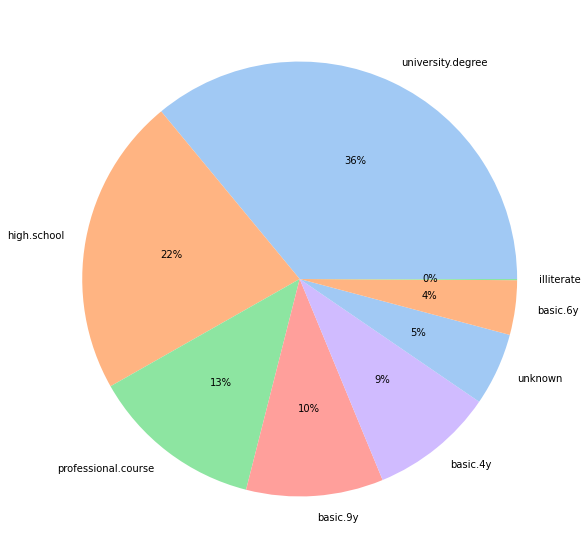

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

colors = sns.color_palette('pastel')[0:5]

plt.pie(edu_grp['count'], labels = edu_grp.education, colors = colors, autopct='%.0f%%')
plt.show()

## default

In [ ]:
def_grp = pd.DataFrame(df.default.value_counts()).reset_index().rename(columns={'index': 'default', 'default': 'count'})
def_grp['percentage'] = def_grp['count'].apply(lambda x: 100 * x / sum(def_grp['count'])).round(2)
def_grp

,default,count,percentage
0,no,4197,90.45
1,unknown,443,9.55


## housing & loan

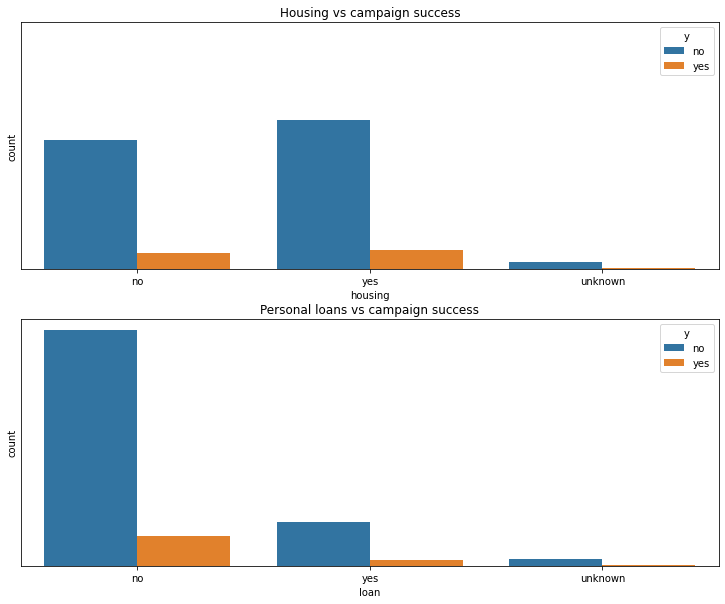

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12.5, 10), sharey=True)
sns.countplot(ax=axes[0], x= 'housing', hue = 'y', data=df_origin)
axes[0].set_title('Housing vs campaign success')
sns.countplot(ax=axes[1], x= 'loan', hue = 'y', data=df_origin)
axes[1].set_title('Personal loans vs campaign success')
plt.yticks([])
plt.show()

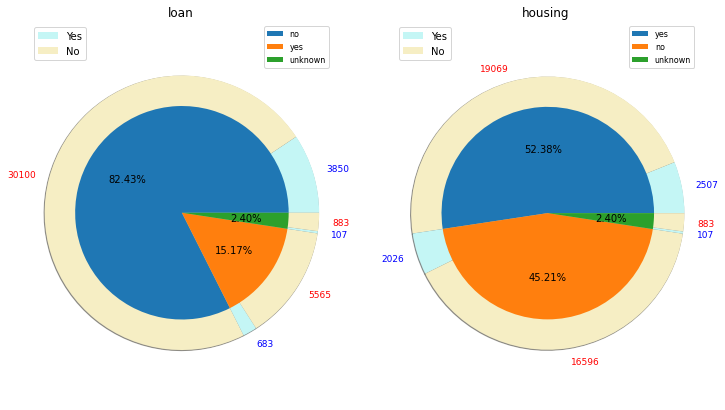

In [ ]:
f, axes = plt.subplots(1,2, figsize=(12,7), sharey = True) 
num_col = ['loan', 'housing']

for j,col in enumerate(num_col):
    cols = df_origin[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []  
    for pop in pop_types: 
        size = len(df_origin[df_origin[col] == pop].index)
        edibles = len(df_origin[(df_origin[col] == pop) & (df_origin['y'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(1,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

It can clearly be observed that the primary target audience is persons who do not have personal loans. Meanwhile, the ratio between individuals who have / do not have housing loans is fairly balanced. There is nothing unusual about the subscription rate.

## month

In [ ]:
table = pd.pivot_table(df_origin, index=['month', 'y'],
                     aggfunc='count', values='age').rename(columns={'age':'count_'})
table['percentage'] = round((table['count_'] / table.groupby(level=0).count_.transform(sum) * 100),2).astype(str) + '%'

table = table.reset_index()
table

,month,y,count_,percentage
0,apr,no,2093,79.52%
1,apr,yes,539,20.48%
2,aug,no,5523,89.4%
3,aug,yes,655,10.6%
4,dec,no,93,51.1%
5,dec,yes,89,48.9%
6,jul,no,6525,90.95%
7,jul,yes,649,9.05%
8,jun,no,4759,89.49%
9,jun,yes,559,10.51%


In [ ]:
fig = px.bar(data_frame=table, x='month', y='count_', color='y', barmode="group", text='percentage', width=800,
    height=400, category_orders={"month": ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]})
fig.show(renderer='colab')

While May has the most approaches, it also has the least subscriptions, with just 6.43% of those approaching opting to subscribe to a term deposit.  Meanwhile, March, despite its low number of hits, is the only month in which those who agree to subscribe exceed those who do not. The fact that, in the low-approach-month, the ratio between the two groups of persons who have / have not subscribed is pretty balanced.

In [ ]:
month = pd.DataFrame(df_origin.month.value_counts()).reset_index().rename(columns={'index': 'month', 'month': 'count'})
month['percentage'] = month['count'].apply(lambda x: 100 * x / sum(month['count'])).round(2)
month

,month,count,percentage
0,may,13769,33.43
1,jul,7174,17.42
2,aug,6178,15.00
3,jun,5318,12.91
4,nov,4101,9.96
5,apr,2632,6.39
6,oct,718,1.74
7,sep,570,1.38
8,mar,546,1.33
9,dec,182,0.44


In [ ]:
fig = px.bar(data_frame=month, x='month', y='count', color='count', text='percentage', width=800,
    height=400, category_orders={"month": ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]})
fig.show(renderer="colab")

We can observe that two months, January and February, are missing from the dataset. To put it simply: May is by far the busiest month of the year, accounting for 33.43% of all hits, followed by July and August round up the top three. In contrast, with just 0.44% in total of hits, December is the month with the fewest, followed by March and September.

## contact & day_of_week

In [ ]:
table = pd.pivot_table(df_origin, index=['contact', 'y'],
                     aggfunc='count', values='age').rename(columns={'age':'count_'})
table['percentage'] = round((table['count_'] / table.groupby(level=0).count_.transform(sum) * 100),2).astype(str) + '%'

table = table.reset_index()
table

,contact,y,count_,percentage
0,cellular,no,22291,85.26%
1,cellular,yes,3853,14.74%
2,telephone,no,14257,94.77%
3,telephone,yes,787,5.23%


In [ ]:
fig = px.bar(data_frame=table, x='contact', y='count_', color='y', barmode="group", text='percentage', width=800, height=400)
fig.show(renderer="colab")

In [ ]:
table = pd.pivot_table(df_origin, index=['day_of_week', 'y'],
                     aggfunc='count', values='age').rename(columns={'age':'count_'})
table['percentage'] = round((table['count_'] / table.groupby(level=0).count_.transform(sum) * 100),2).astype(str) + '%'

table = table.reset_index()
table

,day_of_week,y,count_,percentage
0,fri,no,6981,89.19%
1,fri,yes,846,10.81%
2,mon,no,7667,90.05%
3,mon,yes,847,9.95%
4,thu,no,7578,87.88%
5,thu,yes,1045,12.12%
6,tue,no,7137,88.22%
7,tue,yes,953,11.78%
8,wed,no,7185,88.33%
9,wed,yes,949,11.67%


In [ ]:
fig = px.bar(data_frame=table, x='day_of_week', y='count_', color='y', barmode="group", text='percentage', width=1000,
    height=400)
fig.show(renderer="colab")

In [ ]:
table = pd.pivot_table(df, index=['day_of_week', 'contact'],
                     aggfunc='count', values='age').rename(columns={'age':'count_'})
table['percentage'] = round((table['count_'] / table.groupby(level=0).count_.transform(sum) * 100),2).astype(str) + '%'

table = table.reset_index()
table

,day_of_week,contact,count_,percentage
0,fri,cellular,676,79.91%
1,fri,telephone,170,20.09%
2,mon,cellular,708,83.59%
3,mon,telephone,139,16.41%
4,thu,cellular,892,85.36%
5,thu,telephone,153,14.64%
6,tue,cellular,805,84.47%
7,tue,telephone,148,15.53%
8,wed,cellular,772,81.35%
9,wed,telephone,177,18.65%


In [ ]:
fig = px.bar(data_frame=table, x='day_of_week', y='count_', color='contact', barmode="group", text='percentage', width=1000,
    height=400)
fig.show(renderer="colab")

It can be noticed that the biggest number of clients subscribed on Thursday, with more than 800 new subscribers. Furthermore, of all those who have opened a term deposit, the likelihood that they will do it through cellular phone is roughly 80%.

## duration

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



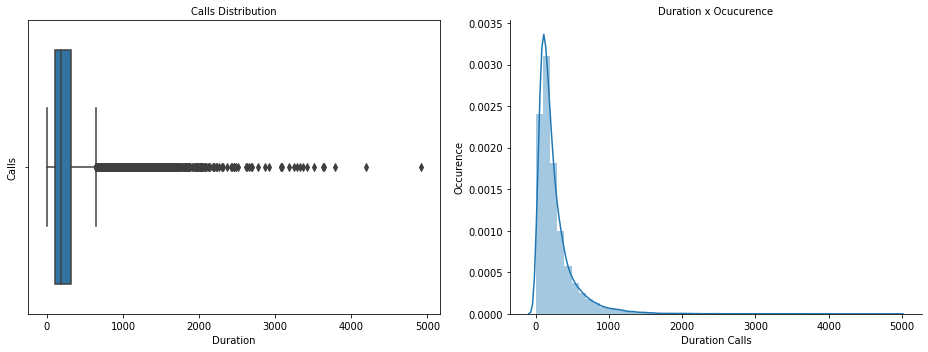

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df_origin, orient = 'v', ax = ax1)
ax1.set_xlabel('Duration', fontsize=10)
ax1.set_ylabel('Calls', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df_origin['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
print("Max duration  call in minutes:  ", round((df_origin['duration'].max()),1))
print("Min duration  call in minutes:   ", round((df_origin['duration'].min()),1))
print("Mean duration call in minutes:   ", round((df_origin['duration'].mean()),1))
print("STD duration  call in minutes:   ", round((df_origin['duration'].std()),1))

Max duration  call in minutes:   4918
Min duration  call in minutes:    0
Mean duration call in minutes:    258.3
STD duration  call in minutes:    259.3


In [ ]:
q1 = df_origin['duration'].quantile(q = 0.25)
q2 = df_origin['duration'].quantile(q = 0.50)
q3 = df_origin['duration'].quantile(q = 0.75)
print('Quartile 1: ', q1)
print('Quartile 2: ', q2)
print('Quartile 3: ', q3)


Quartile 1:  102.0
Quartile 2:  180.0
Quartile 3:  319.0


In [ ]:
print('Duration calls above: ', q3 + 1.5*(q3 - q1), 'are outliers')
print('Numerber of outliers: ', df_origin[df_origin['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(df_origin))
print('Outliers are:', round(df_origin[df_origin['duration'] > 644.5]['duration'].count()*100/len(df_origin),2), '%')

Duration calls above:  644.5 are outliers
Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [ ]:
len(df_origin[(df_origin['duration'] == 0)])

4

## campaign

In [ ]:
df_origin['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [ ]:
q1 = df_origin['campaign'].quantile(q = 0.25)
q2 = df_origin['campaign'].quantile(q = 0.50)
q3 = df_origin['campaign'].quantile(q = 0.75)
print('Quartile 1: ', q1)
print('Quartile 2: ', q2)
print('Quartile 3: ', q3)

Quartile 1:  1.0
Quartile 2:  2.0
Quartile 3:  3.0


In [ ]:
print('Campaign above: ', q3 + 1.5*(q3 - q1), 'are outliers')
print('Numerber of outliers: ', df_origin[df_origin['campaign'] > q3 + 1.5*(q3 - q1)]['campaign'].count())
print('Number of clients: ', len(df_origin))
print('Outliers are:', round(df_origin[df_origin['duration'] > q3 + 1.5*(q3 - q1)]['duration'].count()*100/len(df_origin),2), '%')

Campaign above:  6.0 are outliers
Numerber of outliers:  2406
Number of clients:  41188
Outliers are: 99.78 %


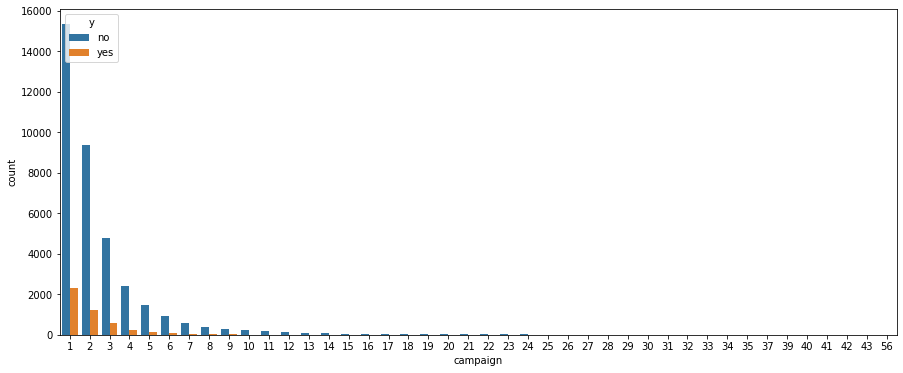

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x = df_origin['campaign'], hue=df_origin["y"])
plt.show()

## pdays

In [ ]:
q1 = df_origin['pdays'].quantile(q = 0.25)
q2 = df_origin['pdays'].quantile(q = 0.50)
q3 = df_origin['pdays'].quantile(q = 0.75)
print('Quartile 1: ', q1)
print('Quartile 2: ', q2)
print('Quartile 3: ', q3)

Quartile 1:  999.0
Quartile 2:  999.0
Quartile 3:  999.0


In [ ]:
df_origin['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

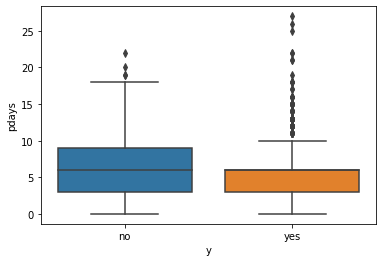

In [ ]:
df1 = df_origin[~(df_origin["pdays"] >= 999)]
sns.boxplot(x = df1["y"], y = df1['pdays'])
plt.show()  

## poutcome

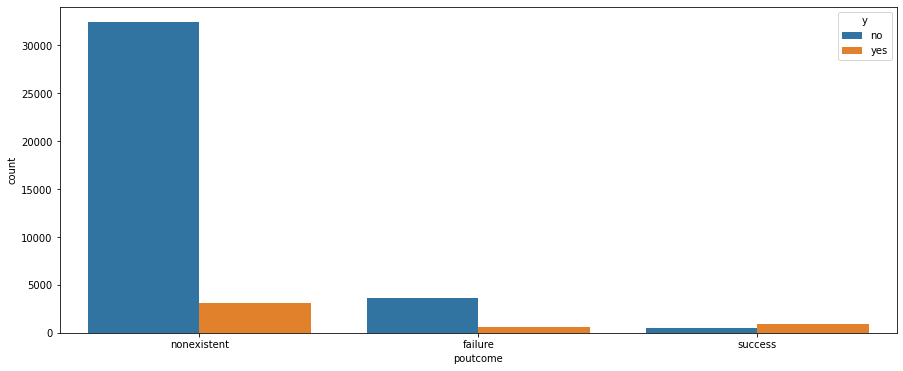

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x = df_origin['poutcome'], hue=df_origin["y"])
plt.show()

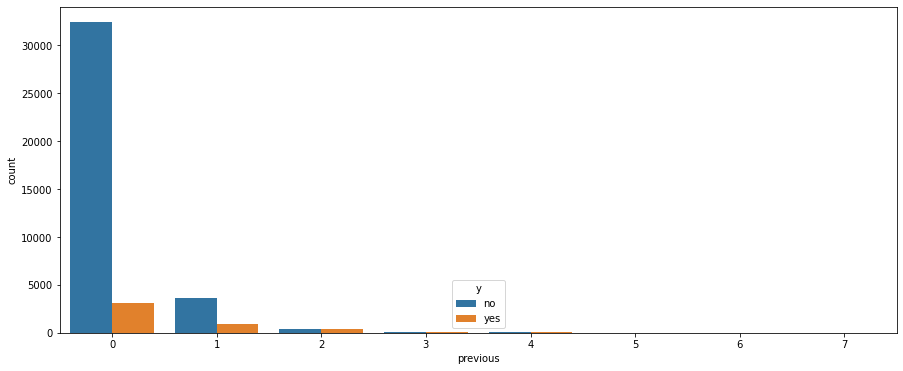

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x = df_origin['previous'], hue=df_origin["y"])
plt.show()

Duration


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



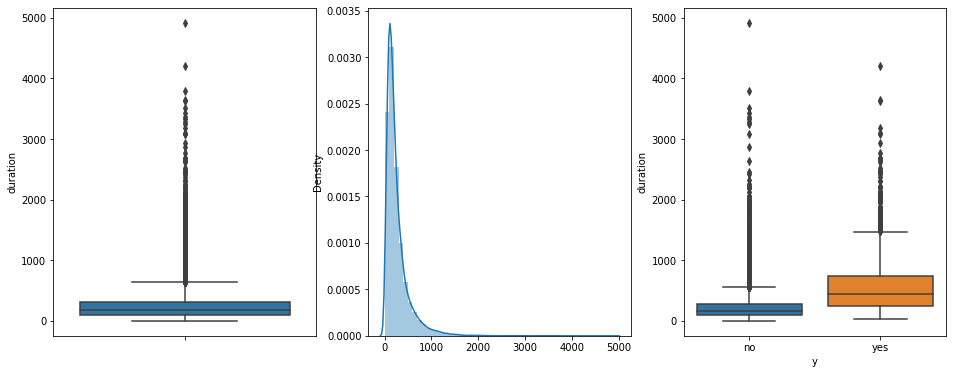

Campaign


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



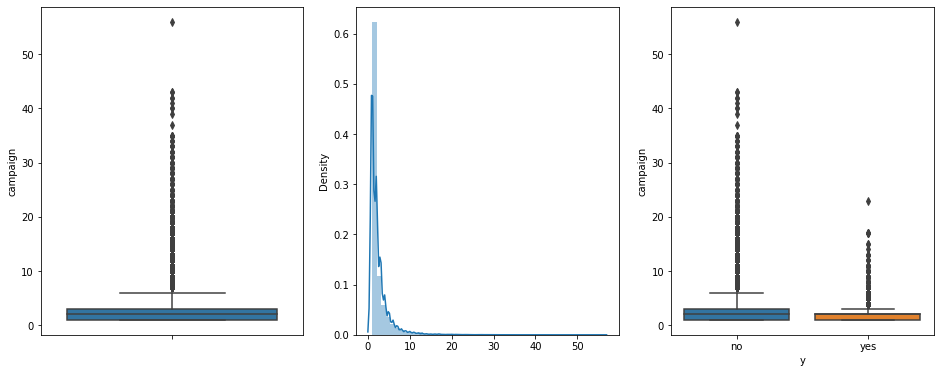

Pdays


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



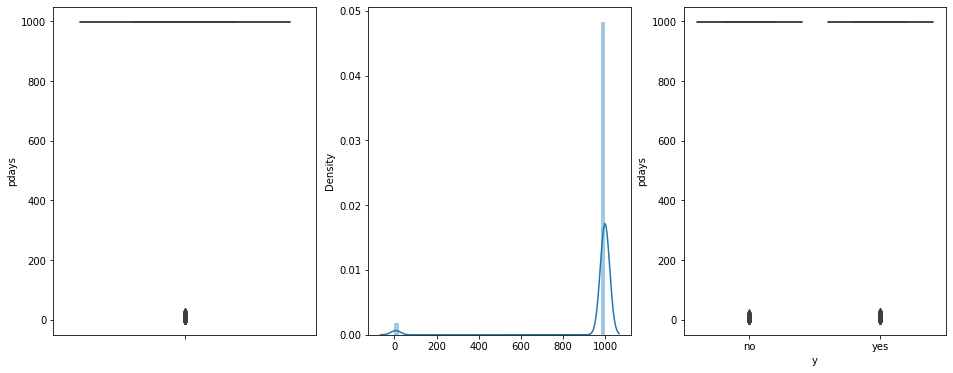

Previous


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



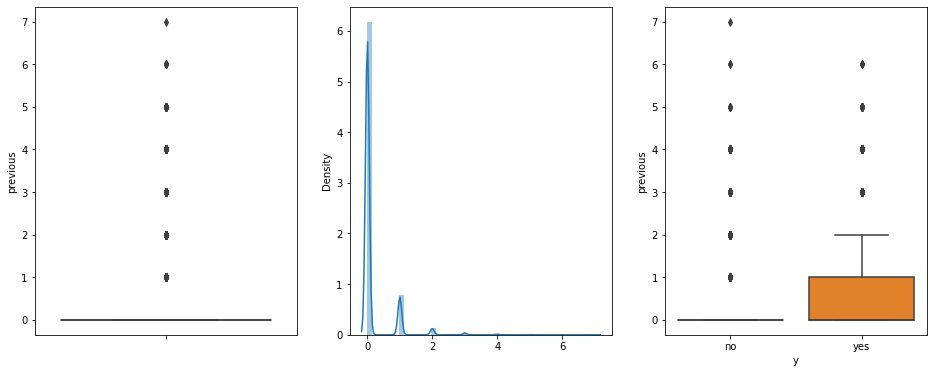

In [ ]:
var_numerical = ["duration", "campaign", "pdays", "previous"]
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = df_origin[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = df_origin[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = df_origin["y"], y = df_origin[column])
    i += 1
    plt.show()

## emp.var.rate


In [ ]:
df_origin['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

<function matplotlib.pyplot.show>

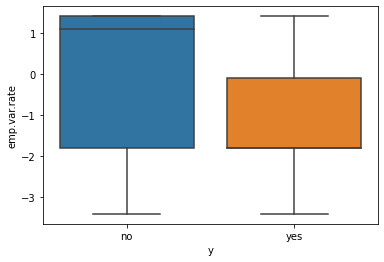

In [ ]:
sns.boxplot(data=df_origin, x='y', y='emp.var.rate')
plt.show

It can be seen that the em.var.rate negatively affects the bank's decision to agree or not.

## cons.price.idx

In [ ]:
df_origin['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [ ]:
px.scatter(data_frame=df_origin[df_origin.y=='yes'], x='cons.price.idx', y='euribor3m', color='y',height=700, width=1000)

## euribor3m


In [ ]:
df_origin.euribor3m.value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

<function matplotlib.pyplot.show>

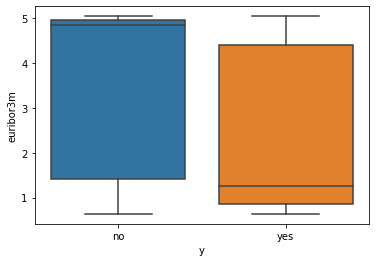

In [ ]:
sns.boxplot(data=df_origin, x='y', y='euribor3m')
plt.show

The medians of the two boxplots are far apart. Need to extract importance of variable through model
> Indented block



<function matplotlib.pyplot.show>

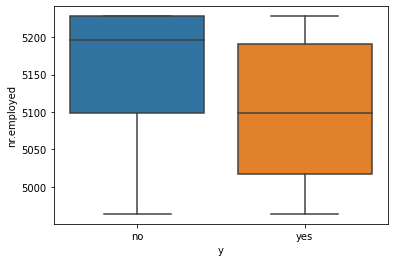

In [ ]:
sns.boxplot(data=df_origin, x='y', y='nr.employed')
plt.show


The more employees a bank has, the more customers register.

## cons.conf.idx

<function matplotlib.pyplot.show>

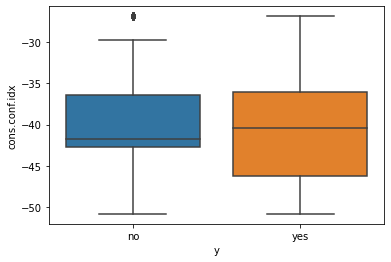

In [ ]:
sns.boxplot(data=df_origin, x='y', y='cons.conf.idx')
plt.show

# Advanced


## Aggregate conversion rate

We'll start by looking at the overall conversion rate. This measure is calculated by dividing the total number of term deposit subscribers by the total number of clients in the data.

In [ ]:
print ('conversion rate: ' + str(df.shape[0] / df_origin.shape[0] * 100.0))

conversion rate: 11.265417111780131


## Conversion rate by age group

In [ ]:
df = df_origin[df_origin.y == 'yes']

In [ ]:
df_origin.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_grp
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"


In [ ]:
tbl = pd.DataFrame(df.groupby(by='age_grp')['y'].count() / df_origin.groupby(by='age_grp')['y'].count() * 100.0).reset_index()
tbl = tbl.rename(columns={'y': 'percentage'})
tbl

,age_grp,percentage
0,"(10, 25]",20.948379
1,"(25, 35]",11.719539
2,"(35, 50]",8.396685
3,"(50, 70]",13.021604
4,70+,47.867299


In [ ]:
fig = px.bar(x = 'age_grp', y='percentage', data_frame = tbl)
fig.show(renderer="colab")

In [ ]:
age_marital_df = df.groupby(['age_grp', 'marital'])['y'].count().unstack('marital').fillna(0)
age_marital_df = age_marital_df.divide(df_origin.groupby(by='age_grp')['y'].count(), axis=0)
age_marital_df

marital,divorced,married,single,unknown
age_grp,,,,
"(10, 25]",0.002401,0.016206,0.190876,0.000000
"(25, 35]",0.005321,0.046743,0.064727,0.000404
"(35, 50]",0.011203,0.055787,0.016748,0.000229
"(50, 70]",0.020272,0.103433,0.006215,0.000296
70+,0.142180,0.322275,0.014218,0.000000


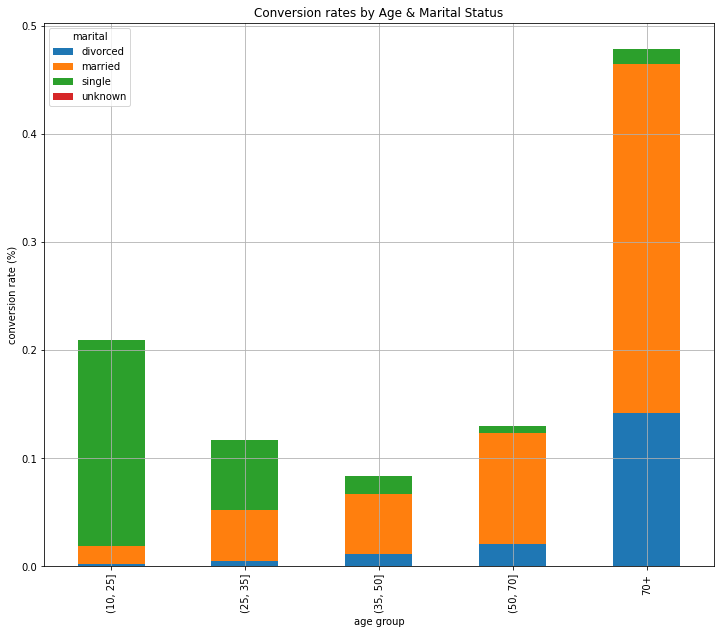

In [ ]:
ax = age_marital_df.loc[['(10, 25]', '(25, 35]', '(35, 50]', '(50, 70]', '70+']].plot( kind='bar', stacked=True, grid=True, figsize=(12,10))
ax.set_title('Conversion rates by Age & Marital Status') 
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()


## Return rate/ New customer rate

In [ ]:
df_origin.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_grp
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]"


In [ ]:
df_origin.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
print('Return rate:', df_origin.loc[(df_origin.poutcome == 'success') & (df_origin.y == 'yes')].shape[0] / df_origin[df_origin.y == 'yes'].shape[0])

Return rate: 0.19267241379310346


In [ ]:
print('Brand new customer rate:', df_origin.loc[(df_origin.poutcome == 'nonexistent') & (df_origin.y == 'yes')].shape[0] / df_origin[df_origin.y == 'yes'].shape[0])

Brand new customer rate: 0.6769396551724138


## euribor3m/ CPI/ y

In [ ]:
fig = px.scatter(data_frame=df, x='cons.price.idx', y='euribor3m', color='y',
           height=700)
fig.show(renderer="colab")

In [ ]:
df_low_cpi = df[df['cons.price.idx'] < 93.5]
df_low_cpi.shape[0] / df.shape[0]

0.6120689655172413

In [ ]:
df_low_eur = df[df['euribor3m'] < 2.5]
df_low_eur.shape[0] / df.shape[0]

0.7114224137931034

In [ ]:
df_lowcpi_loweur = df[(df['cons.price.idx'] < 93.5) & (df['euribor3m'] < 2.5)]
df_lowcpi_loweur.shape[0] / df.shape[0]


0.5125

## Jobs/ Age


In [ ]:
job_y = df.job.value_counts()
job_y = pd.DataFrame(job_y).reset_index()
job_y.columns = ['job', 'count']
job_y['age'] = pd.DataFrame(df[df.y == 'yes'].groupby(['job']).age.mean()).reset_index()['age']
job_y

,job,count,age
0,admin.,1352,37.968935
1,technician,730,39.200627
2,blue-collar,638,41.935484
3,retired,434,52.650943
4,management,328,42.783537
5,services,323,68.253456
6,student,275,38.006711
7,self-employed,149,36.077399
8,unemployed,144,24.800000
9,entrepreneur,124,37.746575


In [ ]:
fig = px.bar(x = 'job', y = 'count', data_frame = job_y, color='age')
fig.show(renderer="colab")

## contact/ duration

As is customary, the longer the salesperson attempts to persuade the buyer, the more likely the consumer will buy the product, so let's visualize the hypothesis with some plots to see if it's true or not.

In [ ]:
df.contact.value_counts()

cellular     3853
telephone     787
Name: contact, dtype: int64

In [ ]:
cell_df = df[df.contact == 'cellular']
tele_df = df[df.contact == 'telephone']

Text(0.5, 1.0, 'telephone')

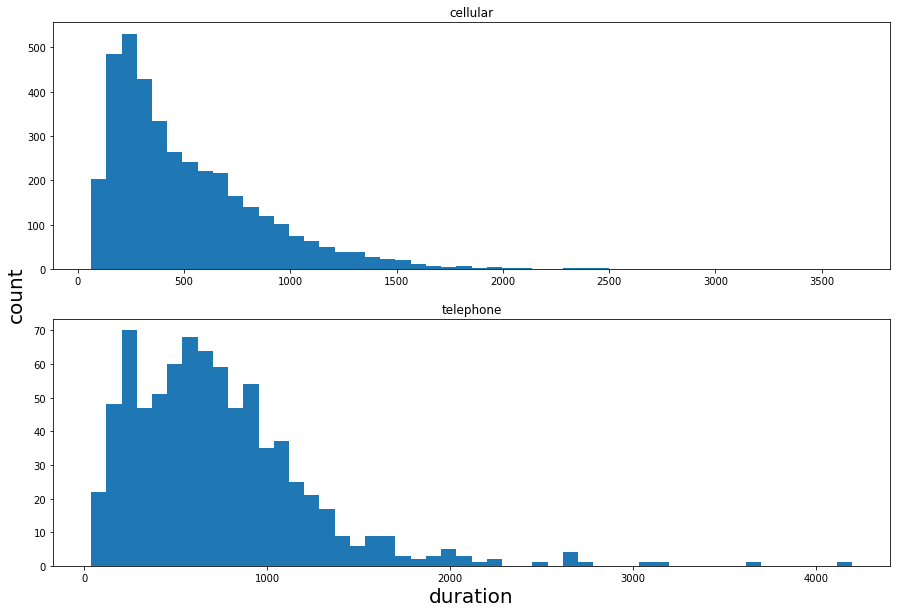

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)    
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


ax1.hist(x=cell_df.duration, bins=50)
ax2.hist(x=tele_df.duration, bins=50)

ax.set_xlabel('duration', fontsize=20)
ax.set_ylabel('count', fontsize=20)

ax1.set_title('cellular')
ax2.set_title('telephone')



In [ ]:
mode = int(stats.mode(cell_df.duration)[0])
s1, s2 = st.t.interval(alpha=0.95, df=len(cell_df.duration)-1, loc=statistics.median(cell_df.duration), scale=st.sem(cell_df.duration))
cell_df[(cell_df.duration >= s1) & (cell_df.duration <= s2)].shape[0]/cell_df.shape[0]


0.026991954321308072

With 3853 and 787 clients, respectively, the number of people who subscribed to term deposits who were approached by cellular dominates the cellular group's statistic. Furthermore, the time of conservation differs between the two groups. People who use cellular phones, on the one hand, like brief discussions that last roughly 200 seconds. People who utilize the telephone, on the other hand, frequently have a lengthier call, lasting roughly 600 seconds.

## Educational/Marital

In [ ]:
# Dropping `unknown`

df_origin.replace('unknown', np.nan, inplace=True)
df_origin.dropna(inplace=True)

In [ ]:
df_origin['marital_education'] = df_origin['marital'] + '_' + df_origin['education']
df_origin.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_grp,marital_education
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]",married_basic.4y
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]",married_high.school
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]",married_basic.6y
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]",married_high.school
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]",married_professional.course


In [ ]:
me = pd.DataFrame(df_origin.groupby('marital_education').y.value_counts()).rename(columns={'y': 'count'})


me['percentage'] = me.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(2)
me = me.reset_index()
me.head()

,marital_education,y,count,percentage
0,divorced_basic.4y,no,258,78.18
1,divorced_basic.4y,yes,72,21.82
2,divorced_basic.6y,no,105,92.11
3,divorced_basic.6y,yes,9,7.89
4,divorced_basic.9y,no,411,94.05


In [ ]:
fig = px.bar(me, x='marital_education', y=['count'], color='y', text=me['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
       width=800, height=700)
fig.show(renderer="colab")

# Modeling

Only the most relevant customer information is considered, which includes job title, education, age, default record, housing record, loan record, contact, duration and Social and economic context attributes (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed). Other information, such as ‘the number of contacts performed before this campaign’, is omitted because it is not directly related to customers themselves.

In [ ]:
df_origin.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_grp,marital_education,response_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]",married_basic.4y,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]",married_high.school,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(35, 50]",married_basic.6y,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]",married_high.school,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 70]",married_professional.course,0


In [ ]:
df_origin.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset, new_column, old_column):
    dataset[new_column] = dataset[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset[new_column].value_counts()

convert(df_origin, "response_binary", "response")
# df_origin.drop(['marital'],axis=1, inplace=True)
# dataset = df_origin.iloc[:, 0:6]

In [ ]:
dataset = df_origin[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'duration', 'previous', 'campaign']]
dataset.head()

,age,job,education,default,housing,loan,contact,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration,previous,campaign
0,56,housemaid,basic.4y,no,no,no,telephone,1.1,93.994,-36.4,4.857,5191.0,261,0,1
2,37,services,high.school,no,yes,no,telephone,1.1,93.994,-36.4,4.857,5191.0,226,0,1
3,40,admin.,basic.6y,no,no,no,telephone,1.1,93.994,-36.4,4.857,5191.0,151,0,1
4,56,services,high.school,no,no,yes,telephone,1.1,93.994,-36.4,4.857,5191.0,307,0,1
6,59,admin.,professional.course,no,no,no,telephone,1.1,93.994,-36.4,4.857,5191.0,139,0,1


###Tranform categorical data into dummy variables

Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing, contacts and loan) are transformed into dummy variables.

Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories.

In [ ]:
dataset2 = pd.get_dummies(dataset, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['contact'] = dataset2['contact'].map({'telephone': 1, 'cellular': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(df_origin['response_binary'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)
dataset2.dropna(inplace=True)

Since the original dataset contained many 'unknown' values, we decided to see if removing these 'unknown' values would improve the model's performance.

In [ ]:
dataset_checkna = dataset.replace('unknown', np.nan)

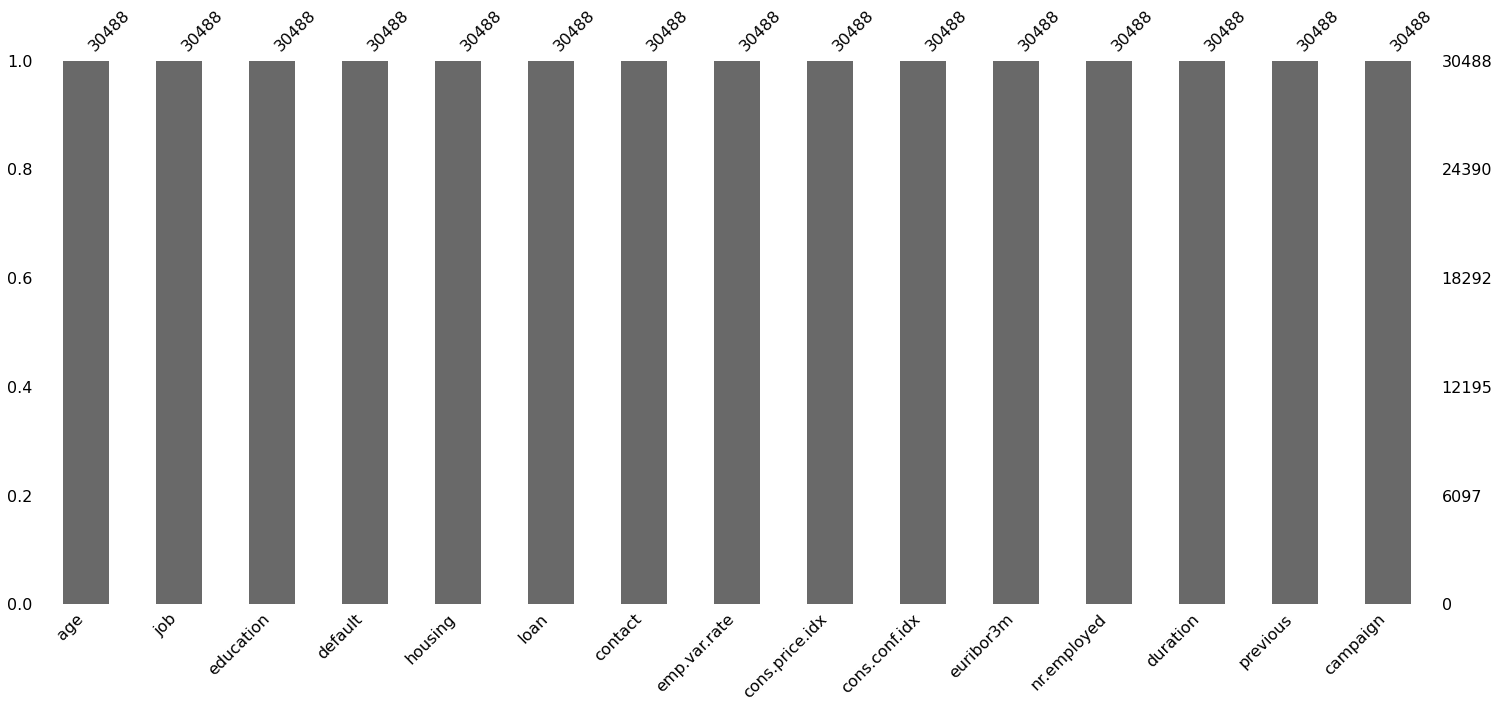

In [ ]:
import missingno as mnso

mnso.bar(dataset_checkna)

In [ ]:
dataset_checkna = pd.merge(dataset_checkna, dataset_response, left_index = True, right_index = True)
total_na = 0
for i in dataset_checkna.columns[:6]:
  total_na += dataset_checkna[(dataset_checkna[i].isna()) & (dataset_checkna['response_binary']==1)].shape[0]
total_na

0

In [ ]:
dataset_checkna[dataset_checkna['response_binary']==1].shape[0]

3859

We can see that out of a total of 4389 values with target = '1', 636 contain 'unknown' (equivalent to 15.5% of the total value).  As a result, it would not be appropriate to eliminate the 'unknown' values.

###Building model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
X = dataset2.drop(['response_binary'],axis=1)
y = dataset2['response_binary']

In [ ]:
test_size= 0.20
seed = 42
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.894998 (0.007180)
CART: 0.878516 (0.007574)


In [ ]:
CART = DecisionTreeClassifier(min_samples_leaf=13)
CART.fit(X_train, Y_train)
predictions = CART.predict(X_test)

In [ ]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8897999344047228


Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves an accuracy of 89.67%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

In [ ]:
print(classification_report(Y_test, predictions,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.93      0.95      0.94      5304
         Yes       0.59      0.51      0.54       794

    accuracy                           0.89      6098
   macro avg       0.76      0.73      0.74      6098
weighted avg       0.88      0.89      0.89      6098



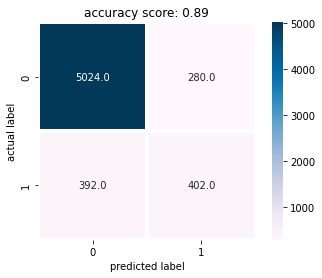

In [ ]:
score = round(accuracy_score(Y_test,predictions),3)
cm= confusion_matrix
cm1=cm(Y_test,predictions)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('accuracy score: {0}'.format(score),size=12)
plt.show()

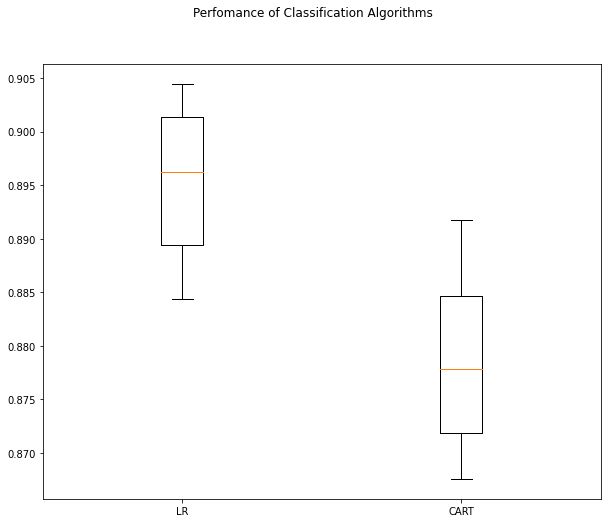

In [ ]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

Logistic regression achieved an accuracy of about 89.5%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

In [ ]:
model_log = LogisticRegression().fit(X_train, Y_train)
model_cart = DecisionTreeClassifier(min_samples_leaf=13).fit(X_train, Y_train) 
y_log_test = model_log.predict_proba(X_test)[:,1]
y_cart_test = model_cart.predict_proba(X_test)[:,1]
log_fpr_test, log_tpr_test, thresold_test = roc_curve(Y_test, y_log_test)
cart_fpr_test, cart_tpr_test, cart_threshold_test = roc_curve(Y_test, y_cart_test)

In [ ]:
y_log_train = model_log.predict_proba(X_train)[:,1]
y_cart_train = model_cart.predict_proba(X_train)[:,1]
log_fpr_train, log_tpr_train, thresold_train = roc_curve(Y_train, y_log_train)
cart_fpr_train, cart_tpr_train, cart_threshold_train = roc_curve(Y_train, y_cart_train)

In [ ]:
y_log_test = model_log.predict_proba(X_test)[:,1]
y_cart_test = model_cart.predict_proba(X_test)[:,1]
auc_log_test = roc_auc_score(Y_test, y_log_test)
auc_cart_test = roc_auc_score(Y_test, y_cart_test)

print('AUC of LogisticRgression on Test: ', auc_log_test)
print('AUC of DecisionTreeClassifier Score on Test: ', auc_cart_test)

AUC of LogisticRgression on Test:  0.9096661043801361
AUC of DecisionTreeClassifier Score on Test:  0.9001446320632497


In [ ]:
y_log_train = model_log.predict_proba(X_train)[:,1]
y_cart_train = model_cart.predict_proba(X_train)[:,1]
auc_log_train = roc_auc_score(Y_train, y_log_train)
auc_cart_train = roc_auc_score(Y_train, y_cart_train)

print('LogisticRgression Score on Train: ', auc_log_train)
print('DecisionTreeClassifier Score on Train: ', auc_cart_train)

LogisticRgression Score on Train:  0.9108582968851899
DecisionTreeClassifier Score on Train:  0.965986586063199


### ROC Curve 

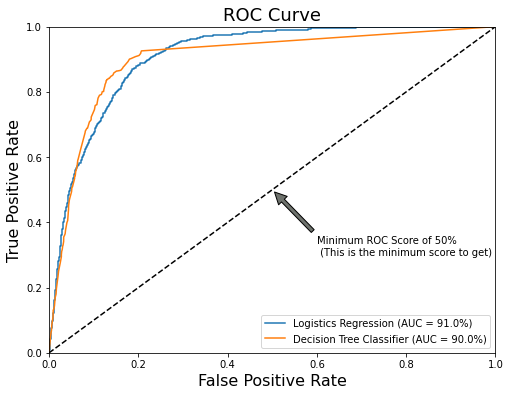

In [ ]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, auc_log, auc_cart):
    auc_log = round(auc_log,2)*100
    auc_cart = round(auc_cart,2)*100
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Logistics Regression (AUC = {}%)'.format(auc_log))
    plt.plot(neu_fpr, neu_tpr, label='Decision Tree Classifier (AUC = {}%)'.format(auc_cart))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr_test, log_tpr_test, cart_fpr_test, cart_tpr_test, auc_log_test, auc_cart_test)
plt.show()

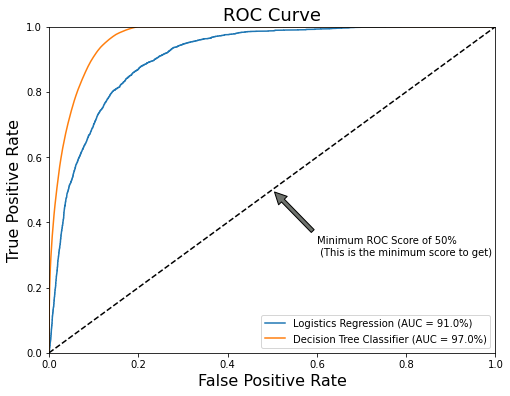

In [ ]:
graph_roc_curve_multiple(log_fpr_train, log_tpr_train, cart_fpr_train, cart_tpr_train, auc_log_train, auc_cart_train)
plt.show()

##Feature Importances

##*DecisionTree*

In [ ]:
model = DecisionTreeClassifier(min_samples_leaf=13)
model.fit(X_train, Y_train)
preds = model.predict(X_test)
accuracy_score(preds, Y_test)

0.8904558871761233

In [ ]:
model.feature_names = dataset2.drop('response_binary', axis = 1).columns
feat_df= pd.DataFrame({'feature': model.feature_names,'importance':model.feature_importances_})
sorted_df=feat_df.sort_values('importance', ascending=False)

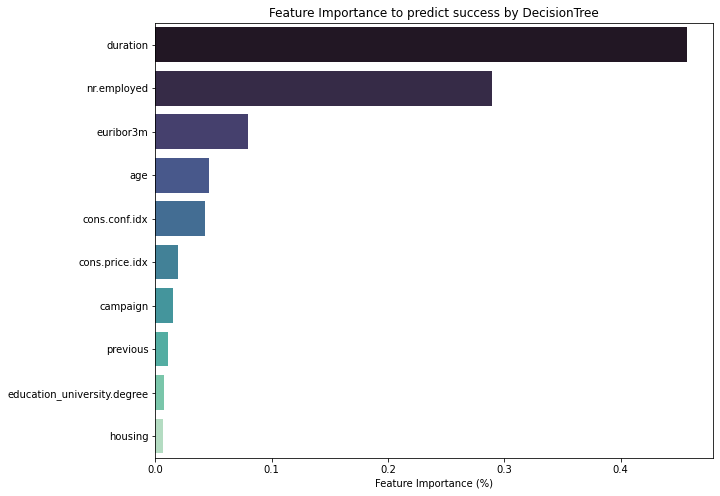

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=sorted_df.head(10), palette='mako' )
plt.title('Feature Importance to predict success by DecisionTree')
plt.xlabel('Feature Importance (%)')
plt.ylabel('')
plt.show()

Using DecisionTree's feature_importances_ function, we can see that 'duration' has the greatest impact on prediction results, which can be explained by the longer the communication time, the more likely they are to subscribe to a term deposit. Follows by 'nr.employed' and 'euribor3m'.

##*LogisticsRegression*

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
preds = model.predict(X_test)
accuracy_score(preds, Y_test)

0.8911118399475237

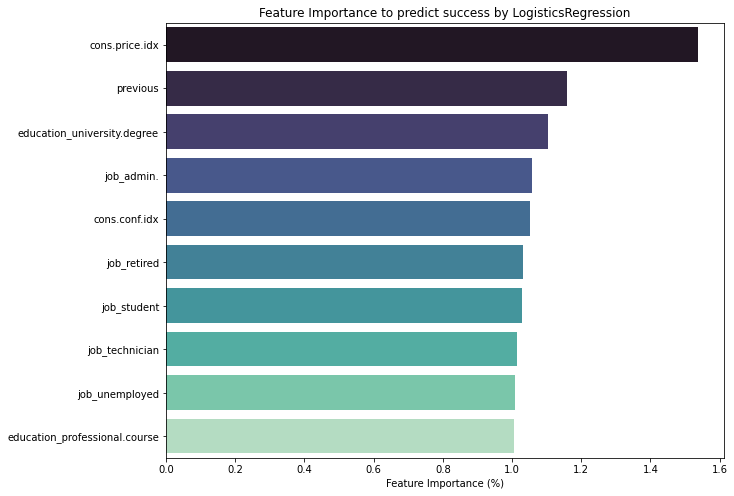

In [ ]:
import math

w0 = model.intercept_[0]
w = model.coef_[0]

feature_importance = pd.DataFrame(X_train.columns.tolist(), columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='mako' )
plt.title('Feature Importance to predict success by LogisticsRegression')
plt.xlabel('Feature Importance (%)')
plt.ylabel('')
plt.show()

Using LogisticsRegression's feature_importances_ function, we can see that 'cons.price.idx' has the greatest impact on prediction results, which can be explained by the longer the communication time, the more likely they are to subscribe to a term deposit. Follows by 'nr.previous' and 'education_university.degree'.

# Conclusion

We decided to use Logistic Regression for this problem. 

#Usage

In [ ]:
class TermSuscriptions:
  def __init__(self, data):
    self.data = data
    self.dataset_col = dataset2

  def read_data(self):
    df_origin = pd.read_csv(self.data, sep=';')
    if df_origin.shape[1] < 13:
      raise ValueError('Not enough required number of columns')
    df_origin.dropna(inplace=True)
    return df_origin
  
  def pre_process(self):
    df_origin = self.read_data()
    data = df_origin[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'duration']]
    dataset = pd.get_dummies(data, columns = ['job'])
    dataset = pd.get_dummies(dataset, columns = ['education'])
    dataset['housing'] = dataset['housing'].map({'yes': 1, 'no': 0, 'unknown':0})
    dataset['default'] = dataset['default'].map({'yes': 1, 'no': 0, 'unknown':0})
    dataset['contact'] = dataset['contact'].map({'telephone': 1, 'cellular': 0})
    dataset['loan'] = dataset['loan'].map({'yes': 1, 'no': 0, 'unknown':0})
    dataset = dataset.reindex(columns = self.dataset_col.columns, fill_value=0)
    dataset.drop(['response_binary'],axis=1,inplace=True)
    return dataset
        
  def LogisticRegression(self):
    df = self.pre_process()
    preds = model_log.predict(df)
    return preds

  def to_dataframe(self):
    df = self.read_data()
    preds = self.LogisticRegression()
    df['response'] = preds
    return df

  def to_csv(self, name):
    df = self.to_dataframe()
    df.to_csv(name,index=False,sep=';')

In [ ]:
# x = TermSuscriptions('/content/da.csv')
# y = x.to_dataframe()
# y